<a href="https://colab.research.google.com/github/IA2122/practica-5-paochoa/blob/main/practica5_adicional1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 5. Ejercicio adicional 1. Comparando clasificadores gráficamente

En este notebook se pretende mostrar gráficamente una comparativa de los distintos algoritmos de clasificación utilizados en la parte obligatoria de la práctica en varios datasets sintéticos. El objetivo de este notebook es ilustrar la naturaleza de los límites de decisión de distintos clasificadores.  

Este notebook está basado en la documentación de sklearn: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

##### Dataset en forma de luna

Comenzamos importando la funcionalidad para generar un dataset en forma de luna. 

In [1]:
from sklearn.datasets import make_moons

Generamos el dataset:

In [2]:
dataset = make_moons(noise=0.3,random_state=64)

Definimos una función que partirá el dataset en un conjunto de entrenamiento y uno de test y nos servirá para mostrar el dataset.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def muestra_dataset(dataset):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
    plt.show()

Mostramos nuestro dataset:

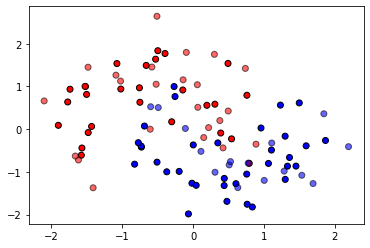

In [4]:
muestra_dataset(dataset)

El dataset anterior consta de puntos de dos tipos o clases: los puntos rojos y los puntos azules. El objetivo de los diferentes clasificadores consiste en ser capaces de definir una zona azul y una zona roja. 

A continuación se define una función que dado un clasificador y un dataset, muestra el borde de decisión para dicho clasificador en el dataset. 

**Nota:** Para este método es importante que el dataset sea de un problema de clasificación binaria (dos clases) y que las clases tengan las etiquetas 0 y 1, de lo contrario el método no funciona correctamente. 

In [5]:
def muestra_limites(clf,dataset):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')

    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)
    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
    plt.show()

Veamos que resultados se obtienen con el algoritmo de KNN con 3 vecinos. Primero definimos el clasificador:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(3)

A continuación llamamos a la función que entrena dicho clasificador y muestra los límites.

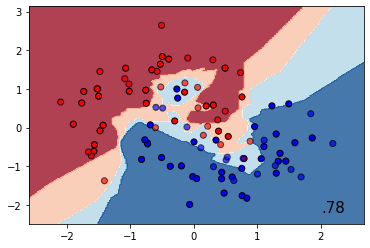

In [7]:
muestra_limites(knn,dataset)

El gráfico anterior muestra los puntos de entrenamiento en color sólido y los puntos de test de manera semi-transparente. Las regiones azul oscuro y rojo oscuro muestran las zonas de decisión que son claramente de la clase azul y de la clase roja; mientras que las zonas claras muestran la frontera de decisión. El valor que aparece abajo a la derecha es la precisión del clasificador.  

El número en la esquina de los diagramas indica la tasa de aciertos.

Las regiones indican la confianza que hay en que ese punto sea de un color (cuanto más débil sea el color menos confianza habrá), pero para la tasa de acierto lo seguirá considerando como acierto (no le afecta).

Repetimos el ejercicio con el clasificador SVM. 

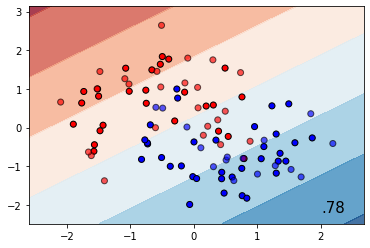

In [8]:
from sklearn.svm import SVC
svc1 = SVC(kernel="linear", C=0.025)
muestra_limites(svc1,dataset)

##### Ejercicio 
Repite el proceso visto para los algoritmos de KNN y SVM con distintos parámetros y también con el resto de algoritmos que se han visto en la parte obligatoria de la práctica. 

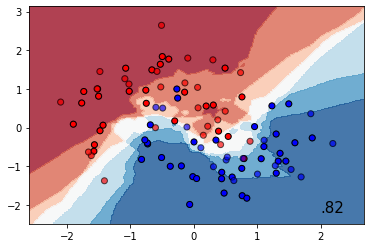

In [9]:
modelKNN7 = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7,dataset)

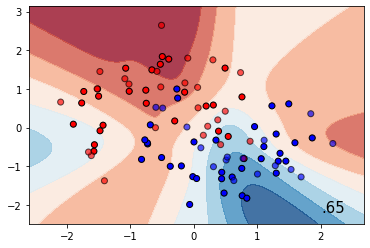

In [10]:
modelSVMSigmoid = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoid,dataset)

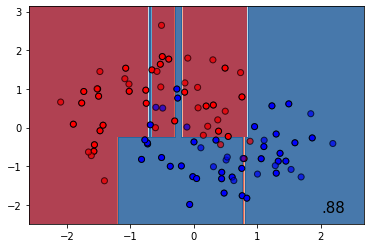

In [11]:
from sklearn.tree import DecisionTreeClassifier
modelArbol = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbol,dataset)

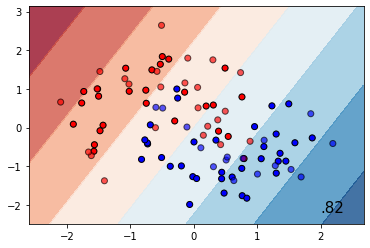

In [12]:
from sklearn.linear_model import Perceptron
modelPerceptron = Perceptron(max_iter=300,eta0=1.0,random_state=84)
muestra_limites(modelPerceptron,dataset)

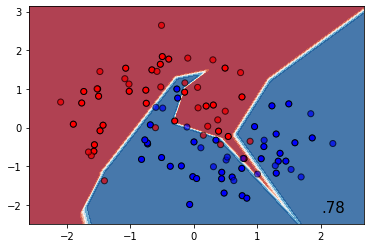

In [13]:
from sklearn.neural_network import MLPClassifier
modelMultiLayerPerceptron = MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptron,dataset)

##### Ejercicio

A continuación se definen otros datasets, repite el proceso para cada uno de estos datasets utilizando distintos clasificadores.

##### Dataset de los círculos

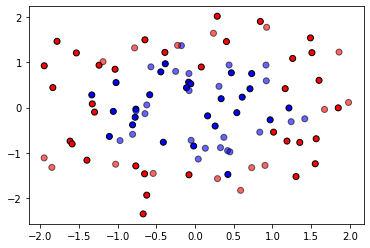

In [14]:
from sklearn.datasets import make_circles
dataset_circles = make_circles(noise=0.2, factor=0.5, random_state=1)
muestra_dataset(dataset_circles)

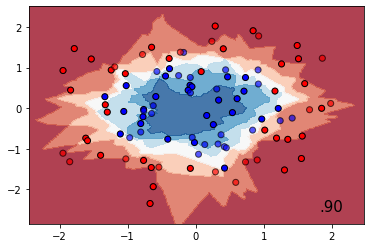

In [15]:
modelKNN7Circulos = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7Circulos,dataset_circles)

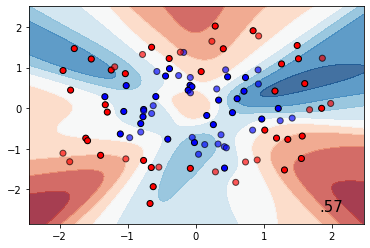

In [16]:
modelSVMSigmoidCirculos = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidCirculos,dataset_circles)

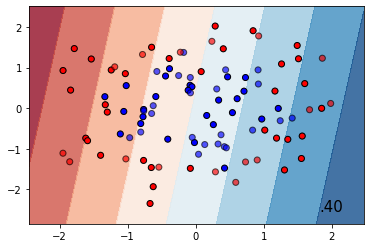

In [17]:
modelSVMLinearCirculos = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearCirculos,dataset_circles)

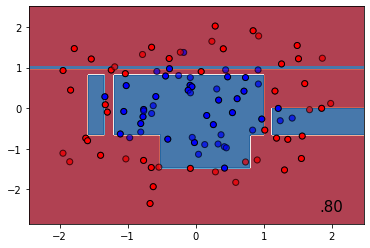

In [18]:
modelArbolCirculos = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolCirculos,dataset_circles)

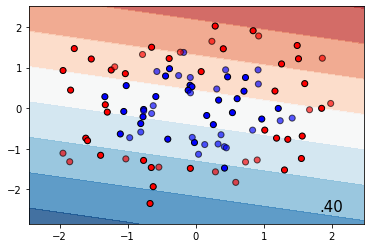

In [19]:
modelPerceptronCirculos = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronCirculos,dataset_circles)

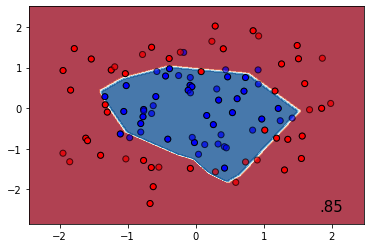

In [20]:
modelMultiLayerPerceptronCirculos = MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronCirculos,dataset_circles)

##### Dataset linealmente separable

In [21]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

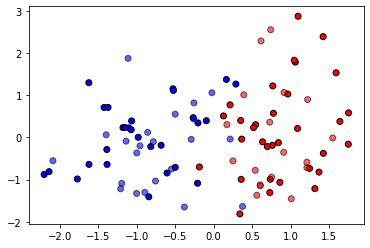

In [22]:
muestra_dataset(linearly_separable)

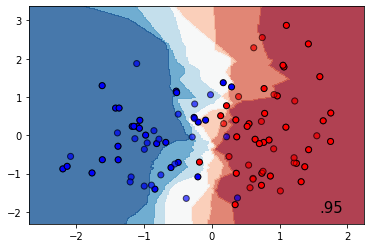

In [23]:
modelKNN7Linear = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7Linear,linearly_separable)

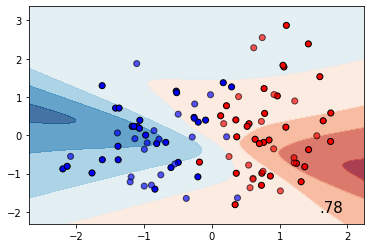

In [24]:
modelSVMSigmoidLinear = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidLinear,linearly_separable)

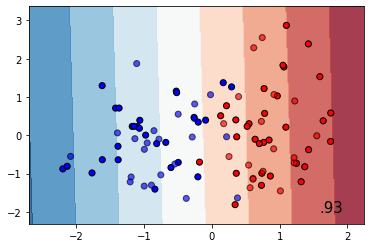

In [25]:
modelSVMLinearLinear = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearLinear,linearly_separable)

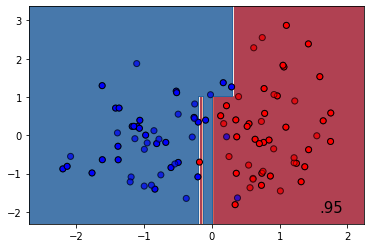

In [26]:
modelArbolLinear = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolLinear,linearly_separable)

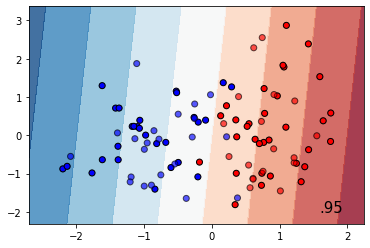

In [27]:
modelPerceptronLinear = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronLinear,linearly_separable)

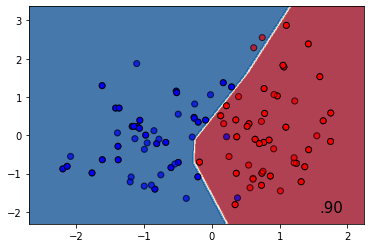

In [28]:
modelMultiLayerPerceptronLinear= MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronLinear,linearly_separable)

##### Dataset blobs

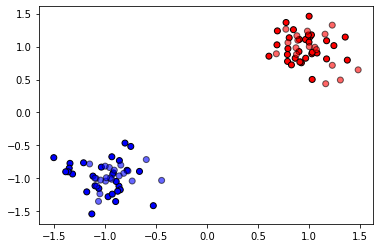

In [29]:
from sklearn.datasets import make_blobs
dataset_blobs = make_blobs(random_state=1, centers=2)
muestra_dataset(dataset_blobs)

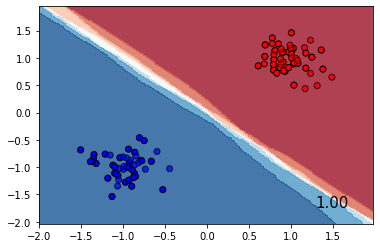

In [30]:
modelKNN7Blobs = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7Blobs,dataset_blobs)

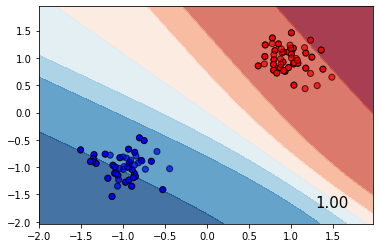

In [31]:
modelSVMSigmoidBlobs = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidBlobs, dataset_blobs)

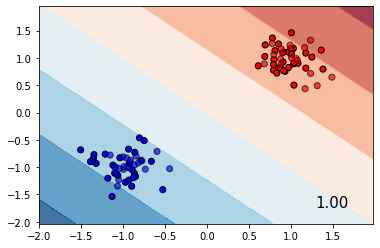

In [32]:
modelSVMLinearBlobs = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearBlobs,dataset_blobs)

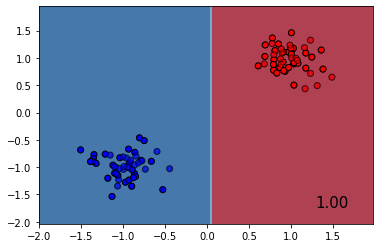

In [33]:
modelArbolBlobs = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolBlobs,dataset_blobs)

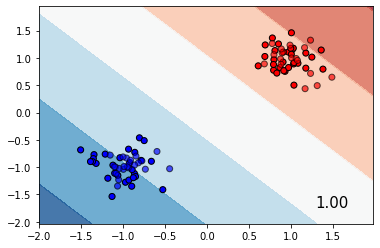

In [34]:
modelPerceptronBlobs = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronBlobs,dataset_blobs)

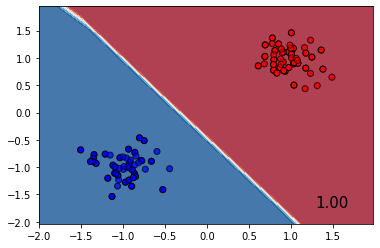

In [35]:
modelMultiLayerPerceptronBlobs= MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronBlobs,dataset_blobs)

##### Dataset Hastie

Para el dataset Hastie, la dimensión de los vectores de descriptores es 10 por lo que no funciona correctamente el proceso de mostrar el dataset. Deberás aplicar una de las técnicas de reducción de la dimensionalidad vistas en la práctica anterior para reducir la dimensión de dichos vectores a 2. Además las etiquetas no son 1s y 0s sino que son 1s y -1s por lo que es necesario cambiar todos los -1s por 0s.

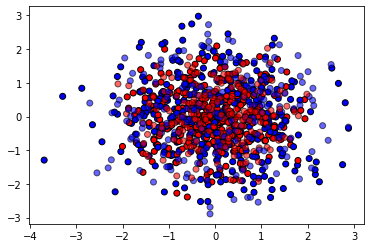

In [36]:
from sklearn.datasets import make_hastie_10_2
dataset_hastie = make_hastie_10_2(n_samples=1000,random_state=1)
muestra_dataset(dataset_hastie)

In [39]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import scale

dataset_hastie0 = scale(dataset_hastie[0])
dataset_hastie1 = dataset_hastie[1]

for i, num in enumerate(dataset_hastie1):
  if num == -1:
    dataset_hastie1[i] = 0

pca = PCA(n_components=2).fit(dataset_hastie0) 
dataset_hastie0 = pca.transform(dataset_hastie0)
dataset_hastie = [dataset_hastie0, dataset_hastie1]

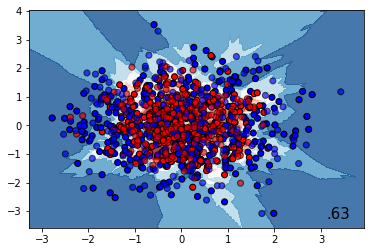

In [40]:
modelKNN7Hastie = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7Hastie,dataset_hastie)

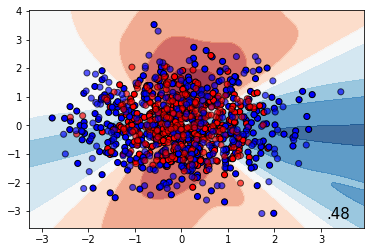

In [41]:
modelSVMSigmoidHastie = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidHastie, dataset_hastie)

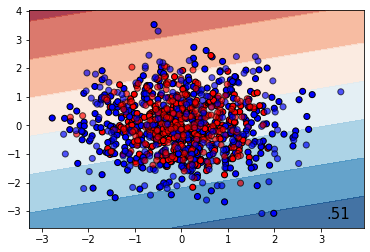

In [42]:
modelSVMLinearHastie = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearHastie,dataset_hastie)

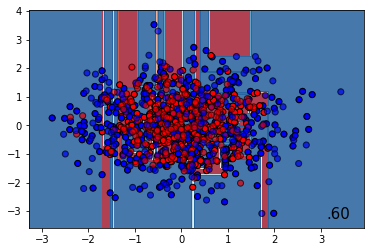

In [43]:
modelArbolHastie = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolHastie,dataset_hastie)

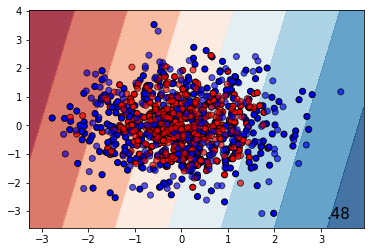

In [44]:
modelPerceptronHastie = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronHastie,dataset_hastie)

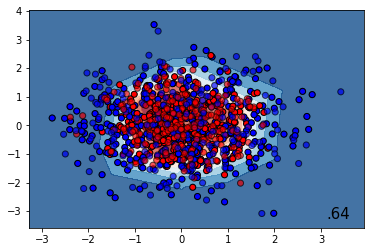

In [45]:
modelMultiLayerPerceptronHastie= MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronHastie,dataset_hastie)

##### Dataset S-curve

Al igual que para el dataset anterior es necesario que reduzcas la dimensión de los vectores de descriptores. Además las etiquetas no son 1s y 0s sino que son valores negativos y positivos, por lo que es necesario cambiar todos los valores negativos por 0s, y todos los positivos por 1s.

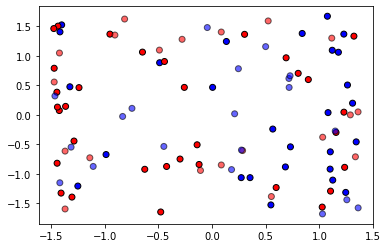

In [46]:
from sklearn.datasets import make_s_curve
dataset_s_curve = make_s_curve(random_state=42)
muestra_dataset(dataset_s_curve)

In [47]:
dataset_s_curve0 = scale(dataset_s_curve[0])
dataset_s_curve1 = dataset_s_curve[1]

for i, num in enumerate(dataset_s_curve1):
  if num < 0:
    dataset_s_curve1[i] = 0
  else:
    dataset_s_curve1[i] = 1

pca1 = PCA(n_components=2).fit(dataset_s_curve0) 
dataset_s_curve0 = pca1.transform(dataset_s_curve0)
dataset_s_curve = [dataset_s_curve0, dataset_s_curve1]

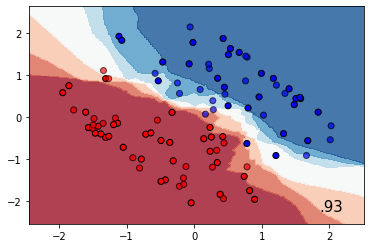

In [48]:
modelKNN7Curve = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7Curve,dataset_s_curve)

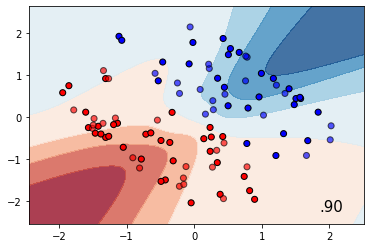

In [49]:
modelSVMSigmoidCurve = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidCurve, dataset_s_curve)

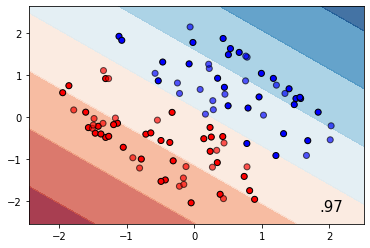

In [50]:
modelSVMLinearCurve = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearCurve,dataset_s_curve)

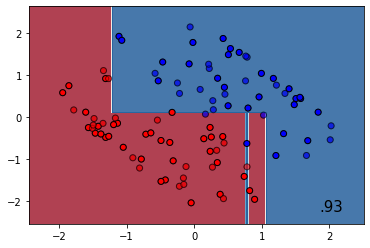

In [51]:
modelArbolCurve = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolCurve,dataset_s_curve)

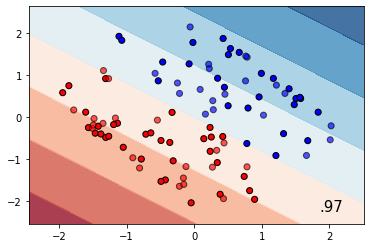

In [52]:
modelPerceptronCurve = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronCurve,dataset_s_curve)

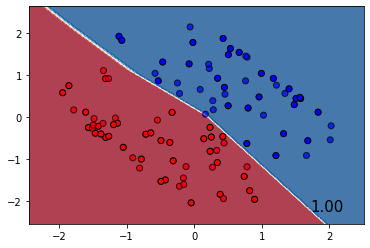

In [53]:
modelMultiLayerPerceptronCurve = MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronCurve,dataset_s_curve)

##### Ejercicio 
Utiliza otros datasets disponibles en la librería sklearn: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets.

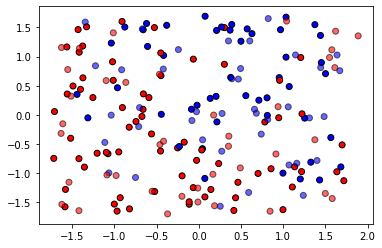

In [54]:
from sklearn.datasets import make_friedman1
dataset_friedman1 = make_friedman1(n_samples= 200)
muestra_dataset(dataset_friedman1)

In [55]:
dataset_friedman10 = scale(dataset_friedman1[0])
dataset_friedman11 = dataset_friedman1[1]

for i, num in enumerate(dataset_friedman11):
  if num > 15:
    dataset_friedman11[i] = 0
  else:
    dataset_friedman11[i] = 1

pca2 = PCA(n_components=2).fit(dataset_friedman10) 
dataset_friedman10 = pca2.transform(dataset_friedman10)
dataset_friedman1 = [dataset_friedman10, dataset_friedman11]

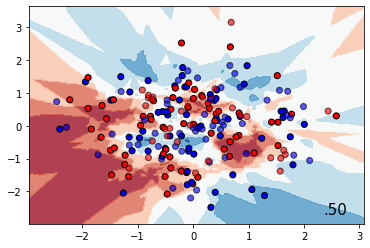

In [56]:
modelKNN7F = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7F,dataset_friedman1)

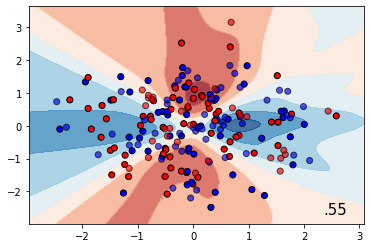

In [57]:
modelSVMSigmoidF = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidF, dataset_friedman1)

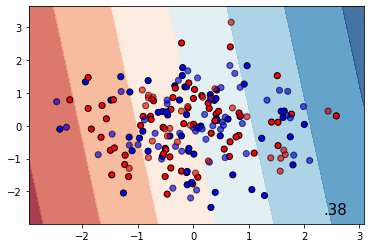

In [58]:
modelSVMLinearF = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearF,dataset_friedman1)

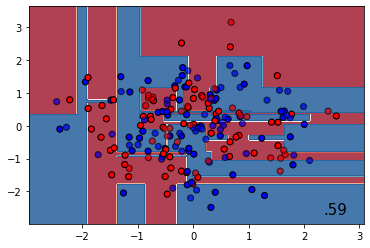

In [59]:
modelArbolF = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolF,dataset_friedman1)

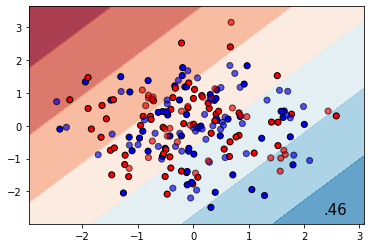

In [60]:
modelPerceptronF = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronF,dataset_friedman1)

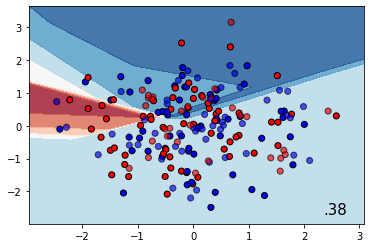

In [61]:
modelMultiLayerPerceptronF = MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronF,dataset_friedman1)

---------------------------------------------------------------

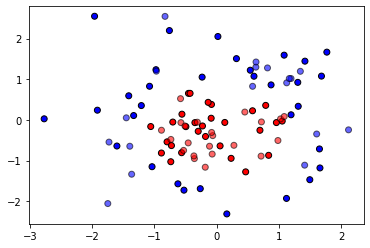

In [63]:
from sklearn.datasets import make_gaussian_quantiles
dataset_gauss = make_gaussian_quantiles(n_classes= 2)
muestra_dataset(dataset_gauss)

In [64]:
dataset_friedman10 = scale(dataset_friedman1[0])
dataset_friedman11 = dataset_friedman1[1]

for i, num in enumerate(dataset_friedman11):
  if num < 1:
    dataset_friedman11[i] = 0
  else:
    dataset_friedman11[i] = 1

pca2 = PCA(n_components=2).fit(dataset_friedman10) 
dataset_friedman10 = pca2.transform(dataset_friedman10)
dataset_friedman1 = [dataset_friedman10, dataset_friedman11]

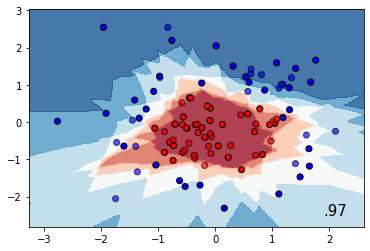

In [65]:
modelKNN7Code = KNeighborsClassifier(n_neighbors=7)
muestra_limites(modelKNN7Code,dataset_gauss)

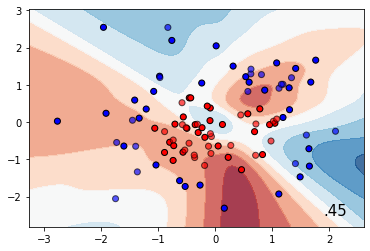

In [66]:
modelSVMSigmoidCode = SVC(kernel="sigmoid", gamma = 2, coef0 = 1, random_state=84)
muestra_limites(modelSVMSigmoidCode, dataset_gauss)

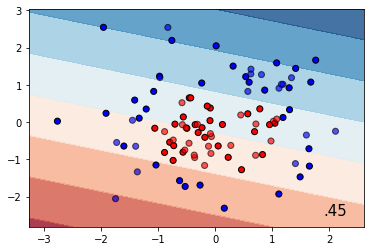

In [67]:
modelSVMLinearCode = SVC(kernel="linear", C=0.025)
muestra_limites(modelSVMLinearCode,dataset_gauss)

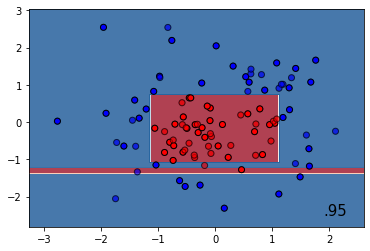

In [68]:
modelArbolCode = DecisionTreeClassifier(random_state=84)
muestra_limites(modelArbolCode,dataset_gauss)

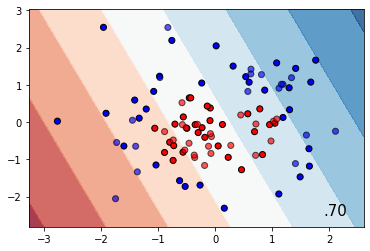

In [69]:
modelPerceptronCode = Perceptron(max_iter=100,eta0=1.0,random_state=84)
muestra_limites(modelPerceptronCode,dataset_gauss)

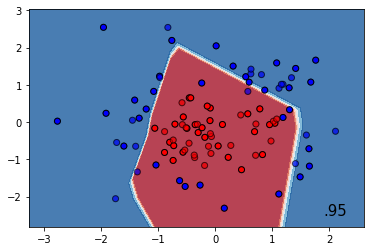

In [70]:
modelMultiLayerPerceptronCode = MLPClassifier(max_iter=300, hidden_layer_sizes=(5,4,3),learning_rate_init=0.1,momentum=0.99, random_state=84)
muestra_limites(modelMultiLayerPerceptronCode,dataset_gauss)

En este notebook se valorará tanto el número de algoritmos de clasificación que utilices como el número de datasets analizados. 

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.